In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
categories = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5']
np.random.seed(1)

data = pd.DataFrame({'date': pd.date_range(start='20150101', periods=1000),
                     'importance': [random.choice(list(range(10))) for _ in range(1000)],
                     'col1': np.random.randn(1000),
                     'col2': np.random.randn(1000),
                     'col3': np.random.randn(1000),
                     'num': [np.random.randint(1, 10) for _ in range(1000)],
                     'num2': [np.random.randint(10, 20) for _ in range(1000)],
                     'initial': np.random.uniform(low=15000000, high=500000000, size=(1000,)),
                     'final': np.random.uniform(low=10000000, high=400000000, size=(1000,)),
                     'size': np.random.uniform(low=10e10, high=9e12, size=(1000,)),
                     'dist': np.random.exponential(scale=1e10, size=(1000,)),
                     'normal': np.random.normal(scale=1.0, size=(1000,)),
                     'category': [random.choice(categories) for _ in range(1000)]
                     })

data['num3'] = data['num'] * np.random.lognormal(mean=0.5, sigma=1.0)
data['diff'] = data['final'] - data['initial']

In [28]:
data.head()

,category,col1,col2,col3,date,dist,final,importance,initial,normal,num,num2,size,num3,diff
0,cat2,1.624345,-0.153236,0.489517,2015-01-01,2.469285e+10,2.243480e+08,4,3.012224e+08,-0.169439,9,16,8.433228e+12,21.632861,-7.687447e+07
1,cat2,-0.611756,-2.432509,0.238796,2015-01-02,3.747786e+09,2.883750e+08,8,3.687506e+08,-0.392196,8,10,1.417947e+12,19.229210,-8.037564e+07
2,cat4,-0.528172,0.507984,-0.448112,2015-01-03,1.306143e+10,7.090274e+07,4,2.967378e+08,-0.870887,6,19,7.946145e+12,14.421907,-2.258350e+08
3,cat1,-1.072969,-0.324032,-0.610795,2015-01-04,3.217359e+09,1.847954e+07,3,2.299050e+08,0.880723,4,16,1.867460e+12,9.614605,-2.114255e+08
4,cat4,0.865408,-1.511077,-2.029945,2015-01-05,1.308824e+10,2.081406e+08,4,2.559424e+08,-0.187252,6,11,4.397173e+12,14.421907,-4.780181e+07


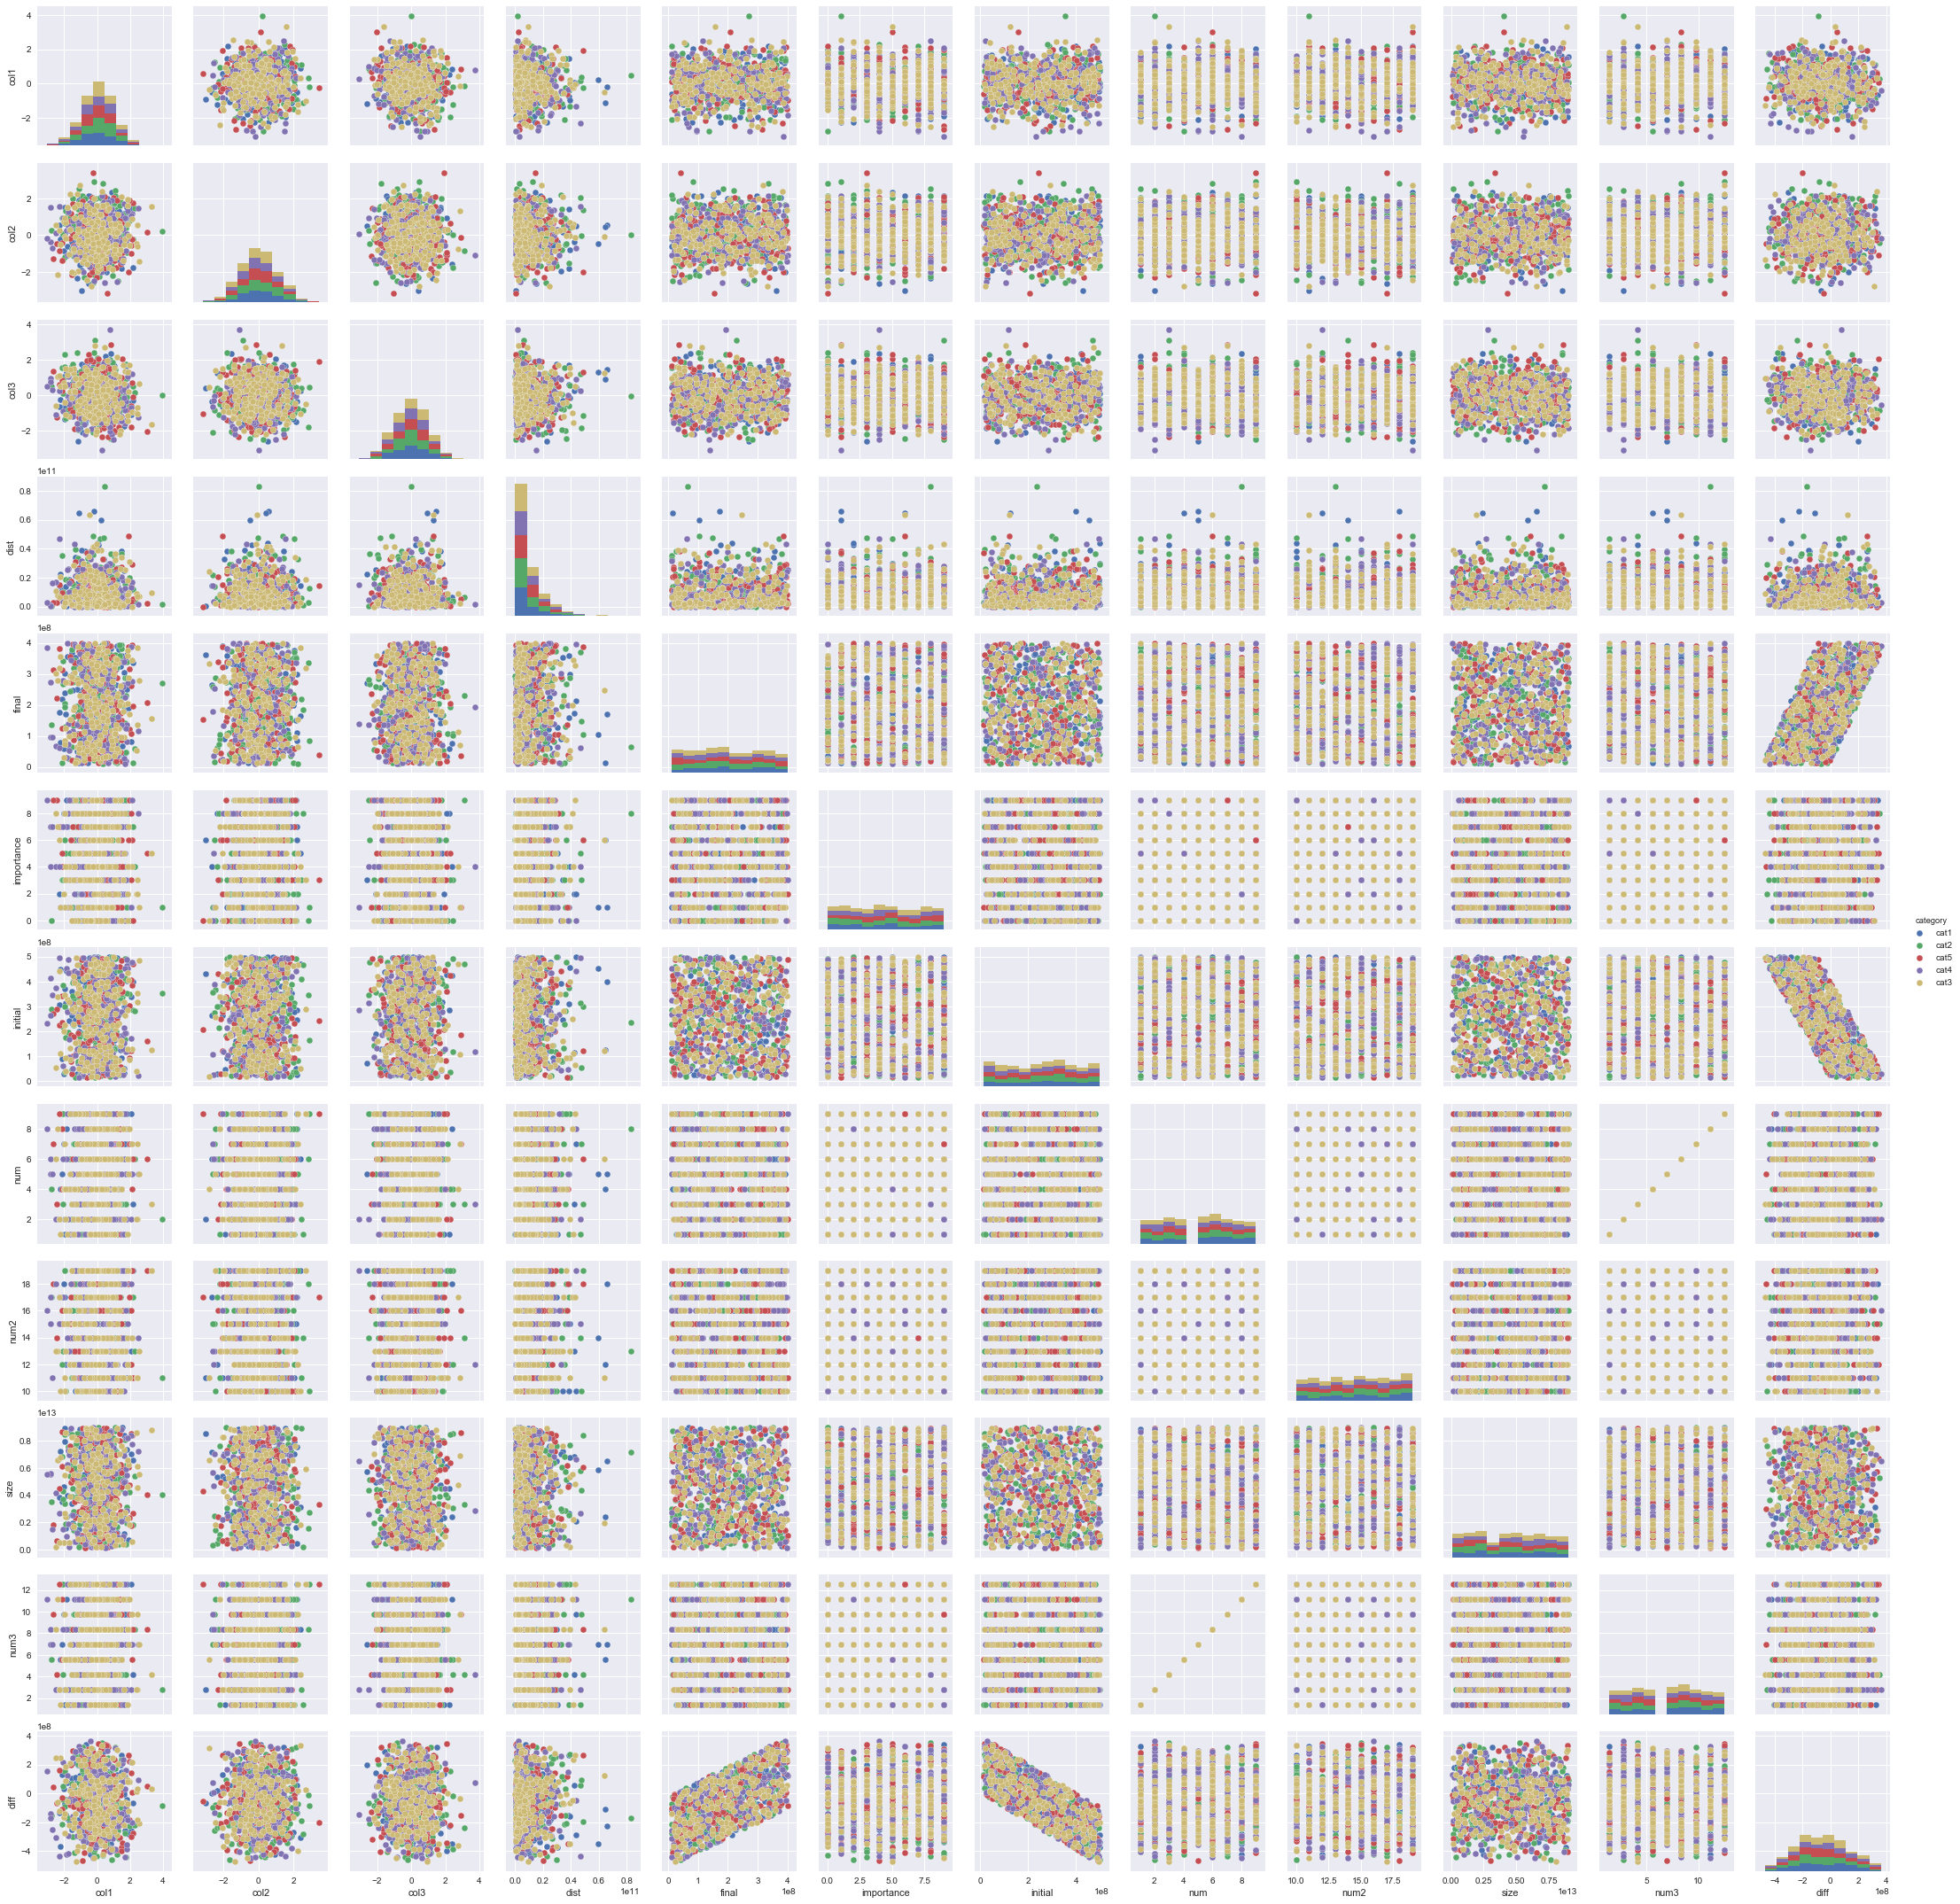

In [4]:
sns.pairplot(data, hue='category')

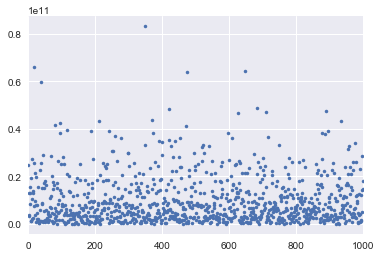

In [5]:
data.dist.plot(style='.')

In [6]:
import plotly
from plotly.graph_objs import *
plotly.offline.init_notebook_mode(connected=True)

ts = pd.DataFrame({'date': pd.date_range(start='2000-01-01', periods=1000),
                   'num': np.random.randn(1000).cumsum(),
                   'num2': np.random.randn(1000).cumsum(),
                   'num3': np.random.randn(1000).cumsum(),})

# ts.set_index('date', inplace=True)

trace0 = Scatter(
    x=ts['date'],
    y=ts['num'],
)
trace1 = Scatter(
    x=ts['date'],
    y=ts['num2'],
)
trace2 = Scatter(
    x=ts['date'],
    y=ts['num3'],
)
d = Data([trace0, trace1, trace2])

plotly.offline.iplot(d, filename='basic-line')

In [7]:
import plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [Scatter(x=np.array(1000), y=np.random.randn(1000).cumsum())],
    "layout": Layout(title='Title')
})

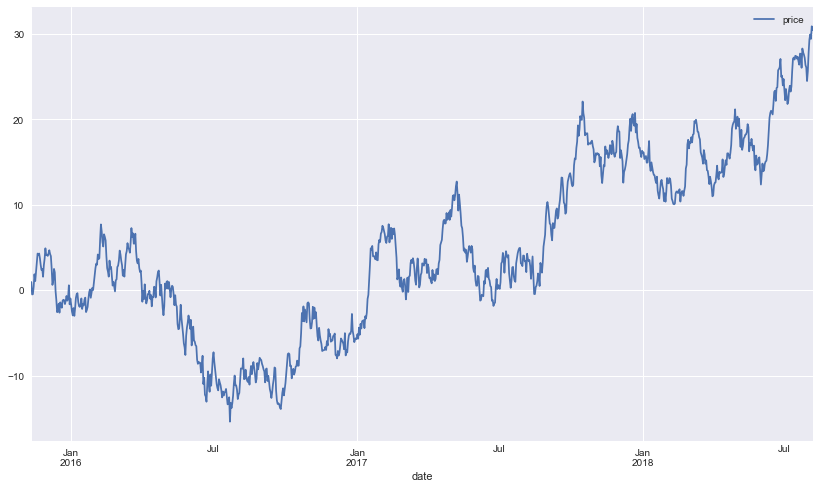

In [8]:
# Time Series emulating equity movements
ticker = pd.DataFrame({'date': pd.date_range(start='20151111', periods=1000),
                      'price': np.random.randn(1000).cumsum()})

ticker.set_index('date', inplace=True)
ax = ticker.plot()
fig = ax.get_figure()
fig.set_size_inches(w=14, h=8)

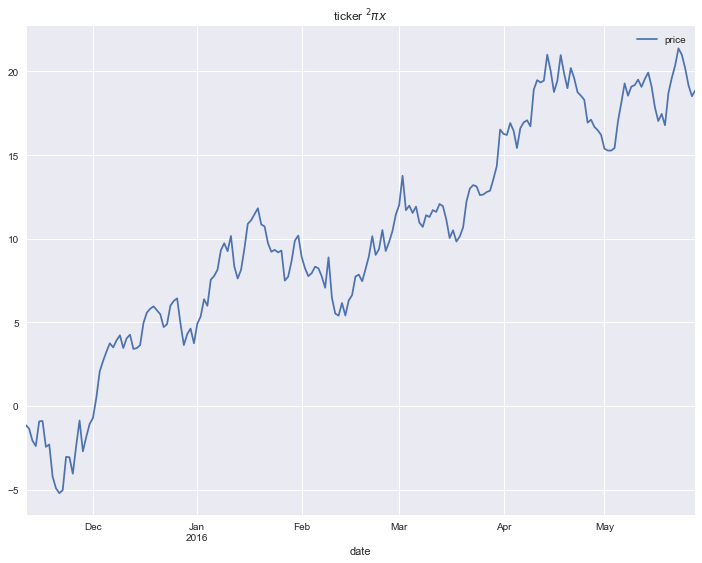

In [9]:
ticker = pd.DataFrame({'date': pd.date_range(start='20151111', periods=200),
                      'price': np.random.randn(200).cumsum()})

ticker.set_index('date', inplace=True)
ax = ticker.plot()
ax.set_title('ticker $^2 \pi x \bigsum{} x$')
ax.figure.set_size_inches(12, 9)

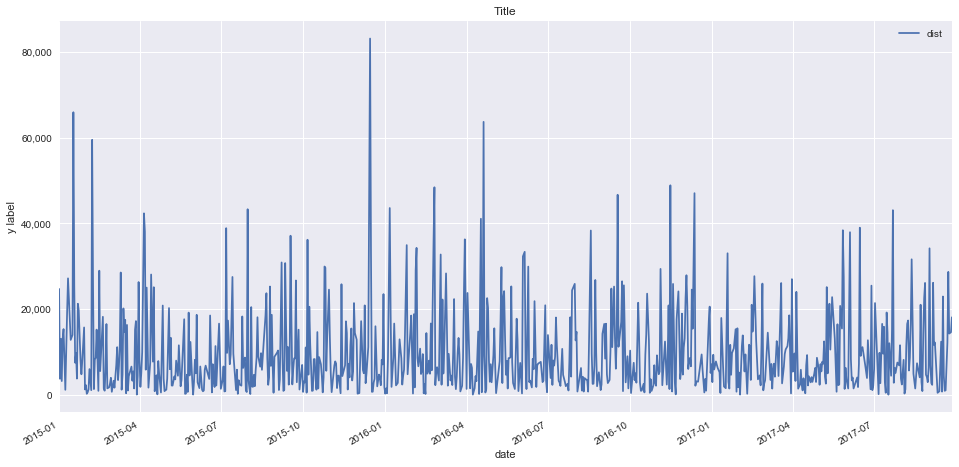

In [30]:
ax = data[(data['category'] != 'cat3')][['date', 'dist']].groupby(by='date').sum().plot(figsize=(13, 6), style='-')
ax.set_ylabel('y label')
# fig.set_yticks([50e8, 100e8])

def hundred_millions(x, pos):
    """ The two args are the value and tick position """
    return '{:,.0f}'.format(x * 1e-6)

formatter = FuncFormatter(hundred_millions)
ax.yaxis.set_major_formatter(formatter)
# fig.fill_between(xs, ys, where=ys>=d, interpolate=True, color='blue')
ax.set_title('Title')
ax.figure.set_size_inches(w=16, h=8)
# ax.set_xlabel('')
# ax.get_figure().savefig('.png', bbox_inches='tight', transparent=True)
# ax.get_figure().savefig('.png', bbox_inches='tight')

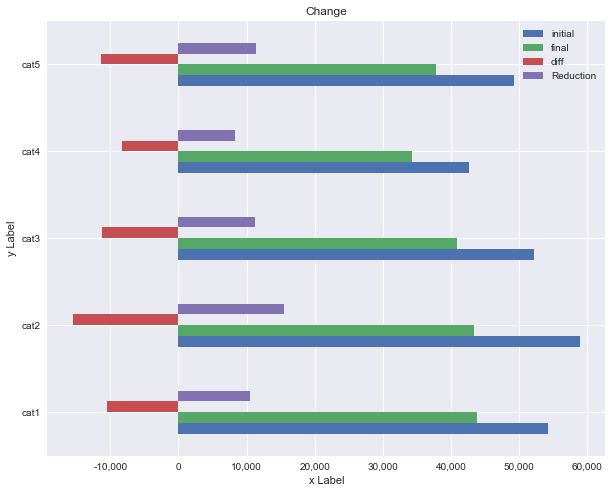

In [11]:
new = data.loc[:,['date', 'category', 'initial', 'final', 'diff']]
new['Reduction'] = new['diff'] * -1
ax = new.groupby(by='category').sum().plot(kind='barh', figsize=(10, 8), stacked=False)
ax.set_ylabel('y Label')
ax.set_xlabel('x Label')
ax.set_title(r'Change')

def hundred_millions(x, pos):
    """ The two args are the value and tick position """
    return '{:,.0f}'.format(x * 1e-6)

formatter = FuncFormatter(hundred_millions)
ax.xaxis.set_major_formatter(formatter)
# ax.get_figure().savefig('filename.png', bbox_inches='tight')

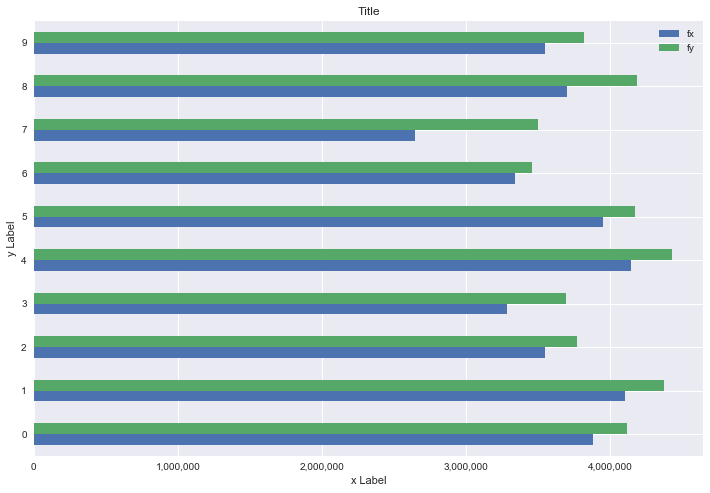

In [15]:
np.random.seed(2)
final_data = pd.DataFrame({'final': np.random.uniform(low=10000000, high=400000000, size=(1000,)),
                           'category': [random.choice(categories) for _ in range(1000)],
                          })

merged_data = data.merge(final_data, on='category')

mapping = {
    'cat1': 'Category 1',
    'cat2': 'Category 2',
    'cat3': 'Category 3',
}

merged_data.replace({'category': mapping}, inplace=True)

def hundred_millions(x, pos):
    """ The two args are the value and tick position """
    return '{:,.0f}'.format(x * 1e-6)

merged_data = merged_data[(merged_data['category'] != 'cat3') & (merged_data['final_y'] > 5e07)]

merged_data.rename(columns={'final_y': 'fy', 'final_x': 'fx'}, inplace=True)
formatter = FuncFormatter(hundred_millions)
ax = merged_data[['fx', 'fy', 'importance']].groupby(by='importance').sum().plot(kind='barh', figsize=(8, 4), stacked=False)
ax.xaxis.set_major_formatter(formatter)
ax.set_title('Title')
ax.set_xlabel('x Label')
ax.set_ylabel('y Label')
# ax.get_figure().savefig('filename.png', bbox_inches='tight')
# ax.get_figure().savefig('filename.pdf')
ax.figure.set_size_inches(w=12, h=8)

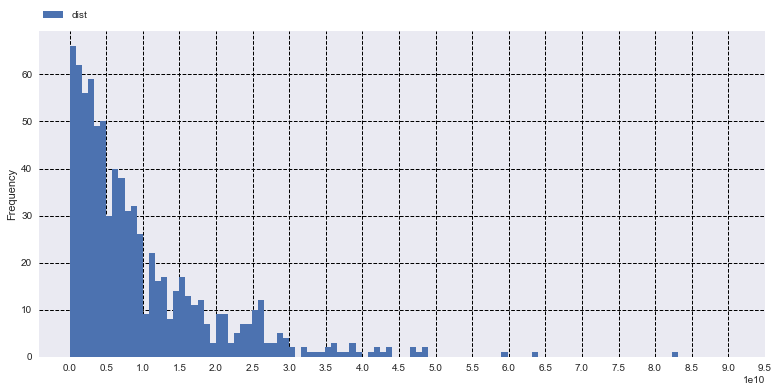

In [16]:
ax = data[(data['category'] != 'cat3')][['date', 'dist']].groupby(by='date').sum().plot(kind='hist', bins=100, figsize=(13, 6), style='-')
ax.set_xticks(np.arange(0, 1e11, 1e11/20))
ax.grid(alpha=1.0, c='black', linestyle='--')
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode='expand', borderaxespad=0.)

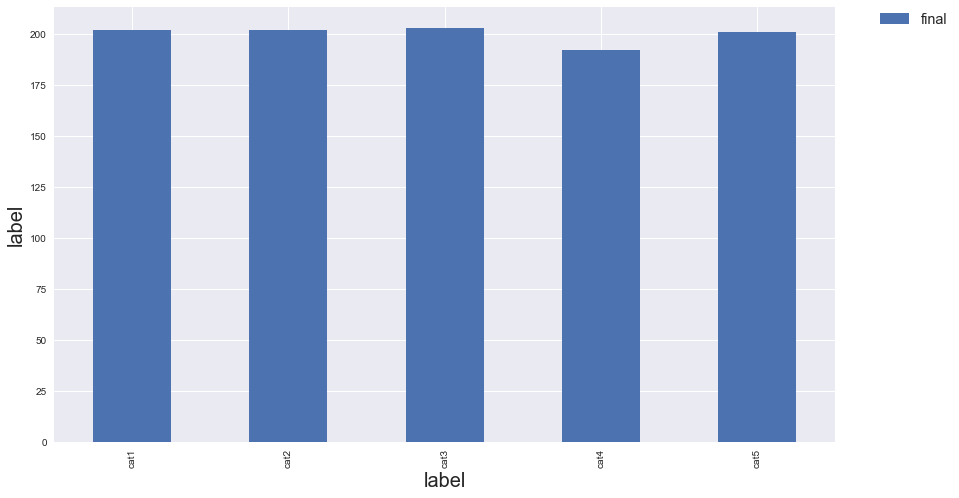

In [31]:
ax = data[['category', 'final']].groupby('category').count().plot(kind='bar')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='x-large')
ax.figure.set_size_inches(w=14, h=8)
ax.set_xlabel('label', fontsize=20)
ax.set_ylabel('label', fontsize=20)